<a href="https://colab.research.google.com/github/RoyDibs/Rebars-and-debris-Classiffication/blob/master/CNN_gp3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications.vgg16 import VGG16 as PretrainedModel,preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Dense,Flatten

!unzip test_set.zip
!unzip training_set.zip
!unzip check_set.zip


IMAGE_SIZE =[200,200]

#Pre-Processing the Training-Set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/training_set/',
                                                 target_size = IMAGE_SIZE,
                                                 batch_size = 128,
                                                 class_mode = 'binary')

#Pre-Processing the Test-Set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/test_set/',
                                            target_size = IMAGE_SIZE,
                                            batch_size = 128,
                                            class_mode = 'binary')

check_set = test_datagen.flow_from_directory('/content/check_set/',
                                            target_size = IMAGE_SIZE,
                                            batch_size = 128,
                                            class_mode = 'binary')


Archive:  test_set.zip
   creating: test_set/
  inflating: test_set/.DS_Store      
   creating: test_set/rebars/
   creating: test_set/debris/
  inflating: test_set/rebars/88.png  
  inflating: test_set/rebars/89.png  
  inflating: test_set/rebars/95.png  
  inflating: test_set/rebars/94.png  
  inflating: test_set/rebars/96.png  
  inflating: test_set/rebars/97.png  
  inflating: test_set/rebars/83.png  
  inflating: test_set/rebars/87.png  
  inflating: test_set/rebars/93.png  
  inflating: test_set/rebars/92.png  
  inflating: test_set/rebars/86.png  
  inflating: test_set/rebars/90.png  
  inflating: test_set/rebars/84.png  
  inflating: test_set/rebars/85.png  
  inflating: test_set/rebars/91.png  
  inflating: test_set/debris/189.png  
  inflating: test_set/debris/200.png  
  inflating: test_set/debris/188.png  
  inflating: test_set/debris/198.png  
  inflating: test_set/debris/199.png  
  inflating: test_set/debris/194.png  
  inflating: test_set/debris/195.png  
  inflating: 

In [ ]:
ptm = PretrainedModel(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)
ptm.trainable=False

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
X = Flatten()(ptm.output)
X=Dense(1,activation='sigmoid')(X)

In [ ]:
model = Model(inputs=ptm.input,outputs=X)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128)       0     

In [ ]:

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
import numpy as np

In [ ]:
A = next(training_set)
A[0][1].shape

(200, 200, 3)

In [ ]:
#Training the CNN on training set and evaluating on Test-Set
mcp_save = ModelCheckpoint('CNN_gp3.h5', save_best_only=True, monitor='val_loss', verbose=1, mode='min')
ES = EarlyStopping(monitor='val_loss', min_delta=0.005, patience=50, mode='min', verbose=1)
#model.fit(x = training_set, validation_data = test_set,callbacks=[mcp_save,ES], epochs = 25)
r = model.fit(training_set, validation_data = test_set,epochs = 25, steps_per_epoch=int(np.ceil(len(training_set)/128)), validation_steps=int(np.ceil(len(test_set)/128)))

Epoch 1/25
1/1 [==============================] - 18s 18s/step - loss: 0.7365 - accuracy: 0.3721 - val_loss: 0.6747 - val_accuracy: 0.5000
Epoch 2/25
1/1 [==============================] - 1s 857ms/step - loss: 0.6677 - accuracy: 0.4651 - val_loss: 0.4976 - val_accuracy: 0.8667
Epoch 3/25
1/1 [==============================] - 12s 12s/step - loss: 0.4647 - accuracy: 0.8984 - val_loss: 0.5465 - val_accuracy: 0.6333
Epoch 4/25
1/1 [==============================] - 2s 2s/step - loss: 0.4868 - accuracy: 0.7500 - val_loss: 0.4848 - val_accuracy: 0.8000
Epoch 5/25
1/1 [==============================] - 2s 2s/step - loss: 0.3809 - accuracy: 0.8516 - val_loss: 0.4069 - val_accuracy: 0.8333
Epoch 6/25
1/1 [==============================] - 1s 841ms/step - loss: 0.2133 - accuracy: 0.9535 - val_loss: 0.3893 - val_accuracy: 0.8333
Epoch 7/25
1/1 [==============================] - 2s 2s/step - loss: 0.2640 - accuracy: 0.9453 - val_loss: 0.4042 - val_accuracy: 0.8333
Epoch 8/25
1/1 [===============

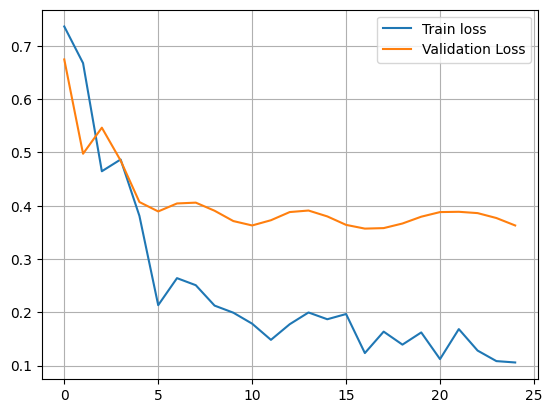

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='Train loss')
plt.plot(r.history['val_loss'],label='Validation Loss')
plt.legend()
plt.grid()

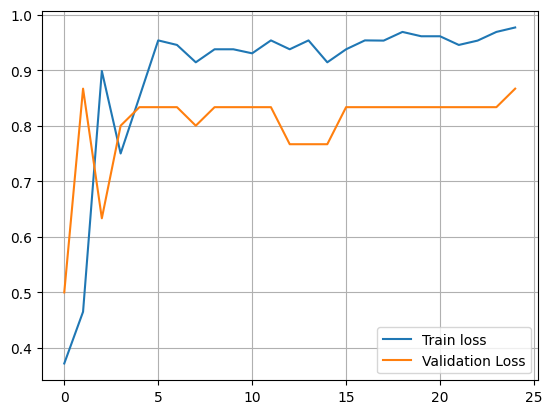

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'],label='Train loss')
plt.plot(r.history['val_accuracy'],label='Validation Loss')
plt.legend()
plt.grid()

In [ ]:
# Making a single prediction:

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
#cnn = tf.keras.models.load_model('CNN_OLD2_1112.h5')
import numpy as np
from tensorflow.keras.preprocessing import image

test_image = image.load_img('/content/14.png', target_size = (200, 200))
test_image = img_to_array(test_image)
test_image /=255
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
if result[0][0] >= 0.6:
      prediction = 'rebar'       
else:
      prediction = 'debris'
print(prediction)
print(result)

1/1 [==============================] - 0s 24ms/step
rebar
[[0.8516889]]


In [ ]:
ypredicted = model.predict(training_set)*100
y_out = []
for i in ypredicted.reshape(-1,1):
  if i <=50:
    y_out.append(0)
  else:
    y_out.append(1)

y_out

2/2 [==============================] - 2s 507ms/step


[1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0]

In [ ]:
ypredicted = model.predict(check_set)*100
y_out = []
for i in ypredicted.reshape(-1,1):
  if i <=50:
    y_out.append(0)
  else:
    y_out.append(1)

y_out

1/1 [==============================] - 2s 2s/step


[0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1]

1/1 [==============================] - 0s 138ms/step


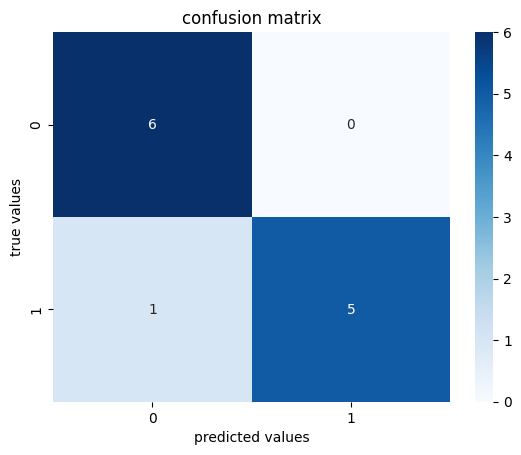

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
#to check random input
a=next(check_set)
y_out = []
y_predicted=model.predict(a[0])
for i in y_predicted:
  if i >= 0.6:
    y_out.append(1)
  else:
    y_out.append(0)

y_original=a[1]
df_out=pd.DataFrame(zip(y_original,y_out),columns=['original','predicted'])
conf_mat=confusion_matrix(df_out['original'],df_out['predicted'])
import seaborn as sns
sns.heatmap(conf_mat,annot=True,fmt='.0f',cmap='Blues');
plt.xlabel("predicted values")
plt.ylabel("true values")
plt.title("confusion matrix");

 predicted level=1	original level=1.0


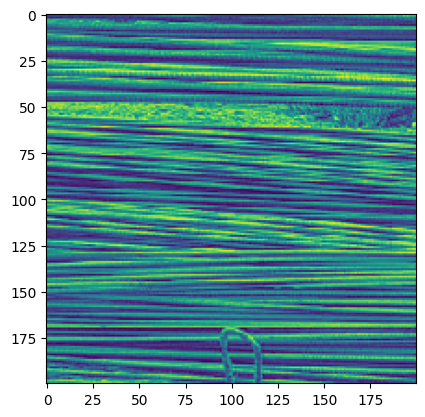

In [ ]:
import tensorflow as tf
i=np.random.randint(0,4)

if(y_out[i]==y_original[i]):
  print(f'\033[92m predicted level={y_out[i]}\toriginal level={y_original[i]}')
else:
  print(f'\033[91m predicted level={y_out[i]}\toriginal level={y_original[i]}')
plt.imshow(tf.image.rgb_to_grayscale(a[0][i]));

 predicted level=0	original level=1.0


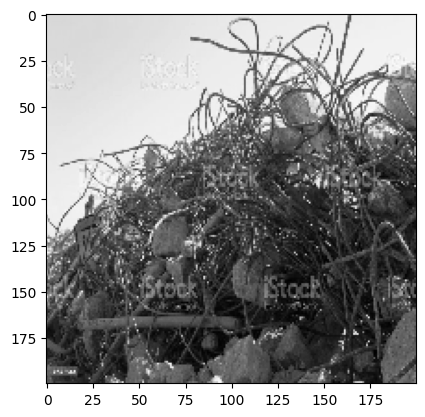

In [ ]:
#i=np.random.randint(0,4)
plt.gray()
miss= np.where(y_out!=y_original)
    
for i in miss:
  print(f'\033[91m predicted level={y_out[int(i)]}\toriginal level={y_original[int(i)]}')
  plt.imshow(tf.image.rgb_to_grayscale(a[0][int(i)]));

# if(y_out[i]==y_original[i]):
#   print(f'\033[92m predicted level={y_out[i]}\toriginal level={y_original[i]}')
# else:
#   print(f'\033[91m predicted level={y_out[i]}\toriginal level={y_original[i]}')
# plt.imshow(tf.image.rgb_to_grayscale(a[0][i]));

1/1 [==============================] - 0s 34ms/step


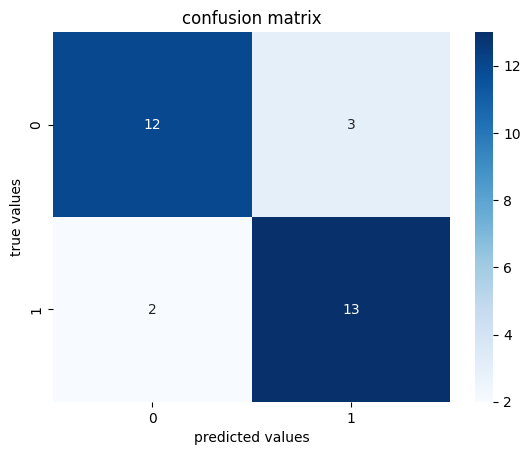

In [ ]:
a=next(test_set)
y_out = []
y_predicted=model.predict(a[0])
for i in y_predicted:
  if i >= 0.6:
    y_out.append(1)
  else:
    y_out.append(0)

y_original=a[1]
df_out=pd.DataFrame(zip(y_original,y_out),columns=['original','predicted'])
conf_mat=confusion_matrix(df_out['original'],df_out['predicted'])
import seaborn as sns
sns.heatmap(conf_mat,annot=True,fmt='.0f',cmap='Blues');
plt.xlabel("predicted values")
plt.ylabel("true values")
plt.title("confusion matrix");

[ 2  4 10 16 22]
 predicted level=1	original level=0.0


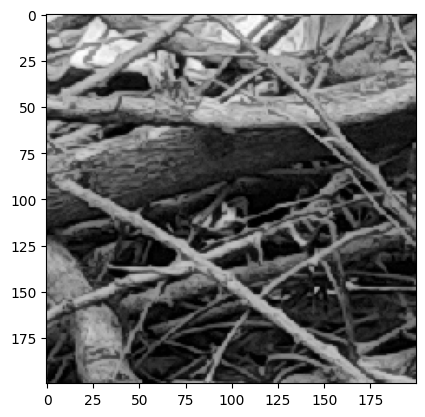

 predicted level=1	original level=0.0


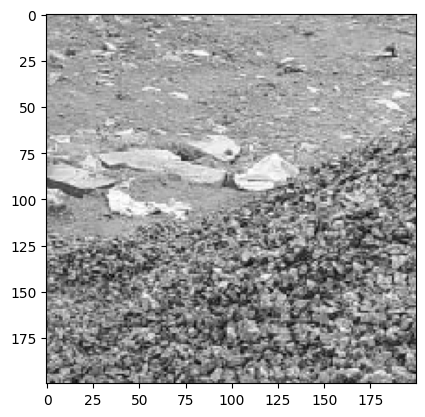

 predicted level=0	original level=1.0


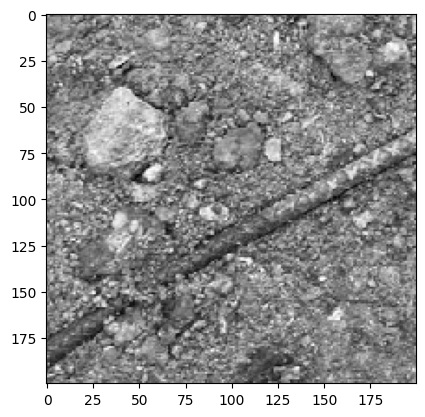

 predicted level=1	original level=0.0


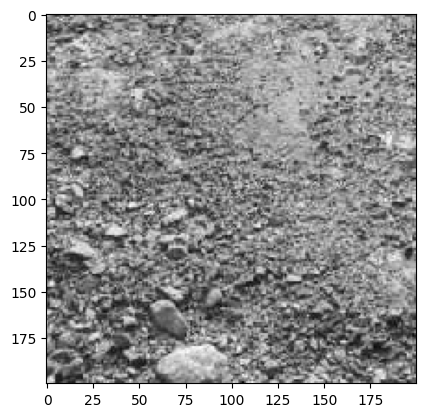

 predicted level=0	original level=1.0


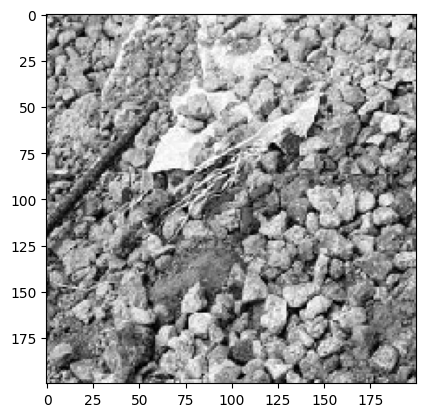

In [ ]:
plt.gray()
miss=np.where(y_out!=y_original)[0]
print(miss)
for i in miss:
  print(f'\033[91m predicted level={y_out[i]}\toriginal level={y_original[i]}')
  plt.imshow(tf.image.rgb_to_grayscale(a[0][int(i)]))
  plt.show()

In [ ]:
miss= np.where(y_out!=y_original)
print(miss)
for i in miss:
  print(i)

(array([ 2,  4, 10, 16, 22]),)
[ 2  4 10 16 22]
